<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [92]:
# следующая строчка подключает сертификат для защищенного соединения
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df1=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [93]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

C:\Lena\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Lena\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


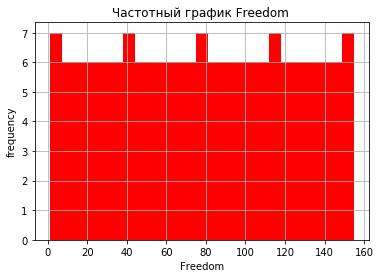

In [94]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 25, facecolor='r')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Частотный график Freedom ')
plt.grid(True)
plt.show()

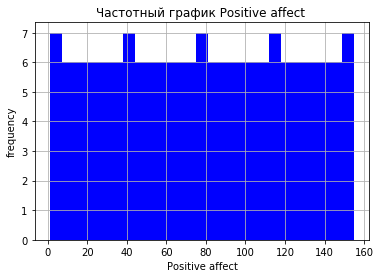

In [95]:
n, bins, patches = plt.hist(df['Positive affect'], 25, facecolor='b')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect ')
plt.grid(True)
plt.show()

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [97]:
fr = df['Freedom']
print(f'Количество выбросов: {fr.isnull().sum()}')
df = df.fillna(0)# Удалим выброс - иначе сумма по столбцу будет неопределена
freedom = df['Freedom']
freedom.isnull().sum()# Проверка на выбросы

Количество выбросов: 1


0

In [98]:
print(f'Медиана колонки Freedom: {statistics.median(freedom)}')
print(f'Математическое ожидание: {statistics.mean(freedom)}')
print(f'Стандартное отклонение: {statistics.pstdev(freedom)}')
print(f'Дисперсия: {statistics.pvariance(freedom)}')
print(f'Min: {min(freedom)}')
print(f'Max {max(freedom)}')
print(f'Размах {max(freedom) - min(freedom)}')
#statistics.pstdev(freedom)**2

Медиана колонки Freedom: 77.5
Математическое ожидание: 77.5
Стандартное отклонение: 45.032395746469746
Дисперсия: 2027.9166666666667
Min: 0.0
Max 155.0
Размах 155.0


In [99]:
print(f'Мода колонки Freedom: {statistics.mode(freedom)}')

StatisticsError: no unique mode; found 156 equally common values

Почему нельзя найти моду?

Потому что наиболее часто встречаемых значений в данной выборке 156. Получается данный метод рассчитан на возврат одной моды и не рассчитан, когда мод несколько.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

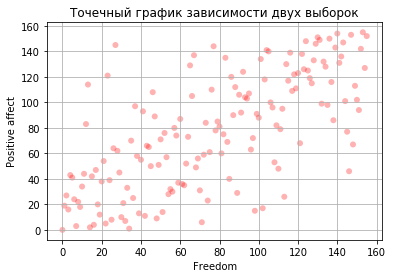

In [100]:
freedom = df['Freedom']
p_affect = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(freedom, p_affect, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.title('Точечный график зависимости двух выборок')
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.show()

Коэффициент корреляции Пирсона: 0.6878506740844935


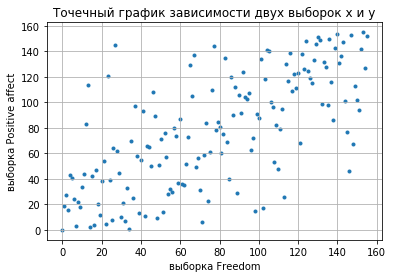

In [101]:
from scipy.stats import pearsonr
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, p_affect, marker='.')
corr, p_value = pearsonr(freedom, p_affect)
print('Коэффициент корреляции Пирсона:', corr)
#Коэффициент говорит о том что зависимость есть(хоть и не совсем сильная), 
#знак коэффициента говорит о том, что при увеличении показателя Freedom увеличивается и показатель Positive affect
#чем больше ощущения счастья/свободы, тем выше положительные эмоции


Нормализовать данные колонки Freedom (централизация + масштабирование)

Так как среднее значение не равно 0, необходимо нормализовать.

Масштабирование выборки

Разброс данных приводим к виду (0,1) либо (-1,1)

In [110]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))
#Если среднее равно 0 = следовательно данные нормализованы? Их только нужно масштабировать?

0.0


In [111]:
print(min(freedom_1))
print(max(freedom_1))

-77.5
77.5


In [112]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

In [116]:
df.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.539362,0.497018,0.528795,0.819032,0.551618,0.216362,0.503355,0.763250,0.766167
SD of Ladder,0.539362,1.000000,0.082705,0.611418,0.591807,0.247567,0.237552,0.386506,0.607169,0.581763
Positive affect,0.497018,0.082705,1.000000,0.401359,0.397996,0.687851,0.220845,0.367205,0.295004,0.305984
Negative affect,0.528795,0.611418,0.401359,1.000000,0.629113,0.441128,0.170228,0.350872,0.528872,0.485725
Social support,0.819032,0.591807,0.397996,0.629113,1.000000,0.459433,0.144422,0.453086,0.706545,0.696689
Freedom,0.551618,0.247567,0.687851,0.441128,0.459433,1.000000,0.409539,0.499736,0.390177,0.375179
Corruption,0.216362,0.237552,0.220845,0.170228,0.144422,0.409539,1.000000,0.280396,0.287388,0.145252
Generosity,0.503355,0.386506,0.367205,0.350872,0.453086,0.499736,0.280396,1.000000,0.480483,0.406702
Log of GDP\nper capita,0.763250,0.607169,0.295004,0.528872,0.706545,0.390177,0.287388,0.480483,1.000000,0.758433
Healthy life\nexpectancy,0.766167,0.581763,0.305984,0.485725,0.696689,0.375179,0.145252,0.406702,0.758433,1.000000


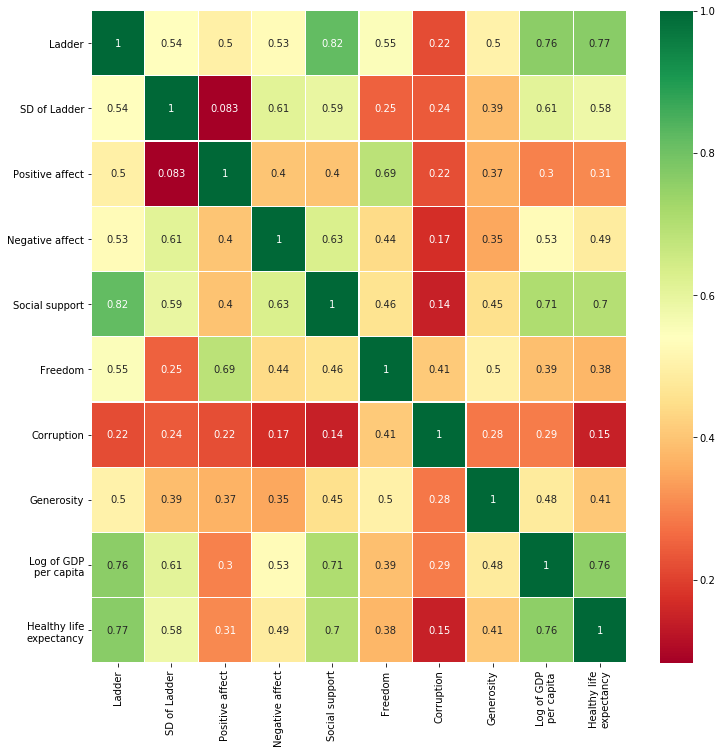

In [113]:
#или как в примере из лекции
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()


Загрузить таблицу цен на авокадо: 

In [121]:
# import io
# import requests
# url="http://yustiks.ru/avocado.csv"
# df=pd.read_csv(url, index_col=False)
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

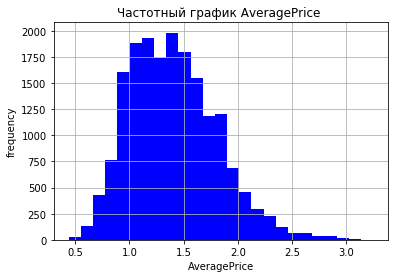

In [122]:
n, bins, patches = plt.hist(df['AveragePrice'], 25, facecolor='b')

plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.title('Частотный график AveragePrice ')
plt.grid(True)
plt.show()
#Это нормальное распределение (распределение Гаусса)

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [136]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['AveragePrice', '4046','4225','4770']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3
0,0.316726,0.000046,0.002660,0.000019
1,0.323843,0.000030,0.002181,0.000023
2,0.174377,0.000035,0.005332,0.000051
3,0.227758,0.000050,0.003516,0.000029
4,0.298932,0.000041,0.002142,0.000030


In [144]:
def norm_corr(df1,df2):
    plt.plot(df1, df2, 'r.')
#     plt.xlabel(' AveragePrice')
#     plt.ylabel('4046')
    plt.show()
    corr, p_value = pearsonr(df1, df2)
    print(corr)


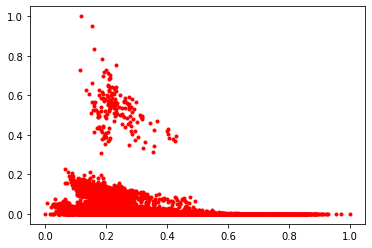

-0.20831704848788474


In [145]:
norm_corr(df_norm[0],df_norm[1])

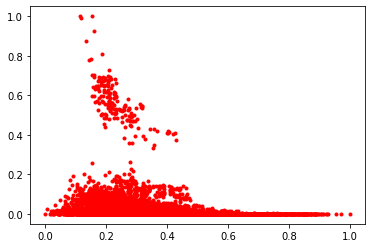

-0.17292777250933544


In [146]:
norm_corr(df_norm[0],df_norm[2])

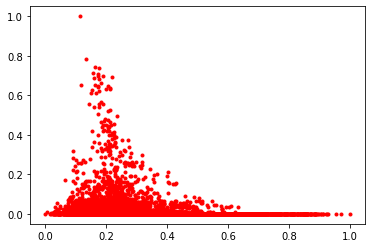

-0.17944598397975617


In [147]:
norm_corr(df_norm[0],df_norm[3])

In [ ]:
#Вывод: обратная корреляция, слабая зависимость, чем больше средняя цена - тем меньше значение другог параметра
#для всех трех графиков выше

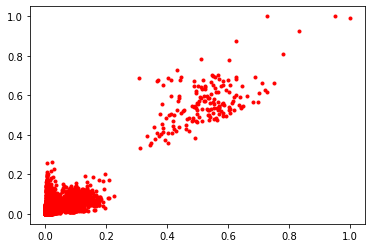

0.9261099558992297


In [148]:
norm_corr(df_norm[1],df_norm[2])

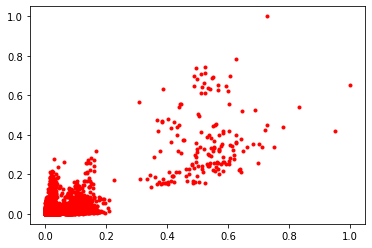

0.8333891041719164


In [149]:
norm_corr(df_norm[1],df_norm[3])

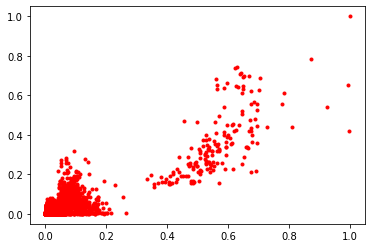

0.8878549976059531


In [151]:
norm_corr(df_norm[2],df_norm[3])

In [ ]:
#Вывод: 4046, 4225, 4770 у этих столбцов прямая корреляция, близка к 1, чем больше одна величина - тем больше и другая